In [1]:
import pandas as pd

In [2]:
# import the datasets 
df_primary = pd.read_csv('primary_data.csv', sep=';')

In [3]:
# check the dataset
df_primary.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


In [4]:
# print the rows and columns
df_primary.shape

(173, 23)

In [5]:
# check the data types
df_primary.dtypes

family                  object
name                    object
class                   object
cap-diameter            object
cap-shape               object
Cap-surface             object
cap-color               object
does-bruise-or-bleed    object
gill-attachment         object
gill-spacing            object
gill-color              object
stem-height             object
stem-width              object
stem-root               object
stem-surface            object
stem-color              object
veil-type               object
veil-color              object
has-ring                object
ring-type               object
Spore-print-color       object
habitat                 object
season                  object
dtype: object

In [6]:
# import the second dataset
df_secondary= pd.read_csv('secondary_data.csv', sep=';', na_values='')

In [7]:
# check the dataset
df_secondary.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [8]:
# print the rows and columns
df_secondary.shape

(61069, 21)

In [9]:
# check the data types
df_secondary.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

Notes before starting...
- Primary data = 173 mushroom species as entries
- Secondary data = 61069 hypothetical mushroom species as entries (353 mushrooms created for each of the 173 species in the primary data). 1 binary class, 20 variables where 17 of them were nominal and 3 were quantitative.
- 2 classes: poisonous and edible

In [10]:
# import all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [11]:
# now we need to make multiple functions to reproduce the results of the paper specifically in figure 4
def drop_missing_data(df):
    df = df.loc[:, df.isnull().mean() < 0.5]
    return df

In [12]:
def impute_missing_data(df):
    for column in df.columns:
        df.loc[:, column].fillna(df[column].mode()[0], inplace=True)
    return df

In [13]:
def separate_features_labels(df):
    X = df.drop('class', axis=1)
    y = df['class']
    return X, y

In [14]:
def encode_features_labels(X, y):
    le = LabelEncoder()
    y = le.fit_transform(y)
    X = pd.get_dummies(X)
    return X, y

In [15]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [16]:
def initialize_classifiers():
    classifiers = {
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
        'Random Forest': RandomForestClassifier()
    }
    return classifiers

In [17]:
def cross_validate_and_evaluate(X_train, y_train, classifiers):
    cv = StratifiedKFold(n_splits=5)
    f2_scorer = make_scorer(fbeta_score, beta=2)

    results = {}
    
    for name, classifier in classifiers.items():
        accuracy = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')
        f2_score = cross_val_score(classifier, X_train, y_train, cv=cv, scoring=f2_scorer)
        
        results[name] = {'accuracy': accuracy, 'f2_score': f2_score}
        
        print(f"{name} - Accuracy: {accuracy.mean():.3f}, F2 Score: {f2_score.mean():.3f}")
    
    return results

In [18]:
def process_and_train(df):
    df = drop_missing_data(df)
    df = impute_missing_data(df)
    X, y = separate_features_labels(df)
    X, y = encode_features_labels(X, y)
    X_train, X_test, y_train, y_test = split_data(X, y)
    classifiers = initialize_classifiers()
    results = cross_validate_and_evaluate(X_train, y_train, classifiers)
    return results

In [19]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [20]:
results_primary = process_and_train(df_primary)

Naive Bayes - Accuracy: 0.449, F2 Score: 0.474
Logistic Regression - Accuracy: 0.471, F2 Score: 0.565
Linear Discriminant Analysis - Accuracy: 0.492, F2 Score: 0.687
Random Forest - Accuracy: 0.544, F2 Score: 0.712


In [21]:
results_secondary = process_and_train(df_secondary)

Naive Bayes - Accuracy: 0.722, F2 Score: 0.768
Logistic Regression - Accuracy: 0.776, F2 Score: 0.794
Linear Discriminant Analysis - Accuracy: 0.778, F2 Score: 0.793
Random Forest - Accuracy: 1.000, F2 Score: 1.000


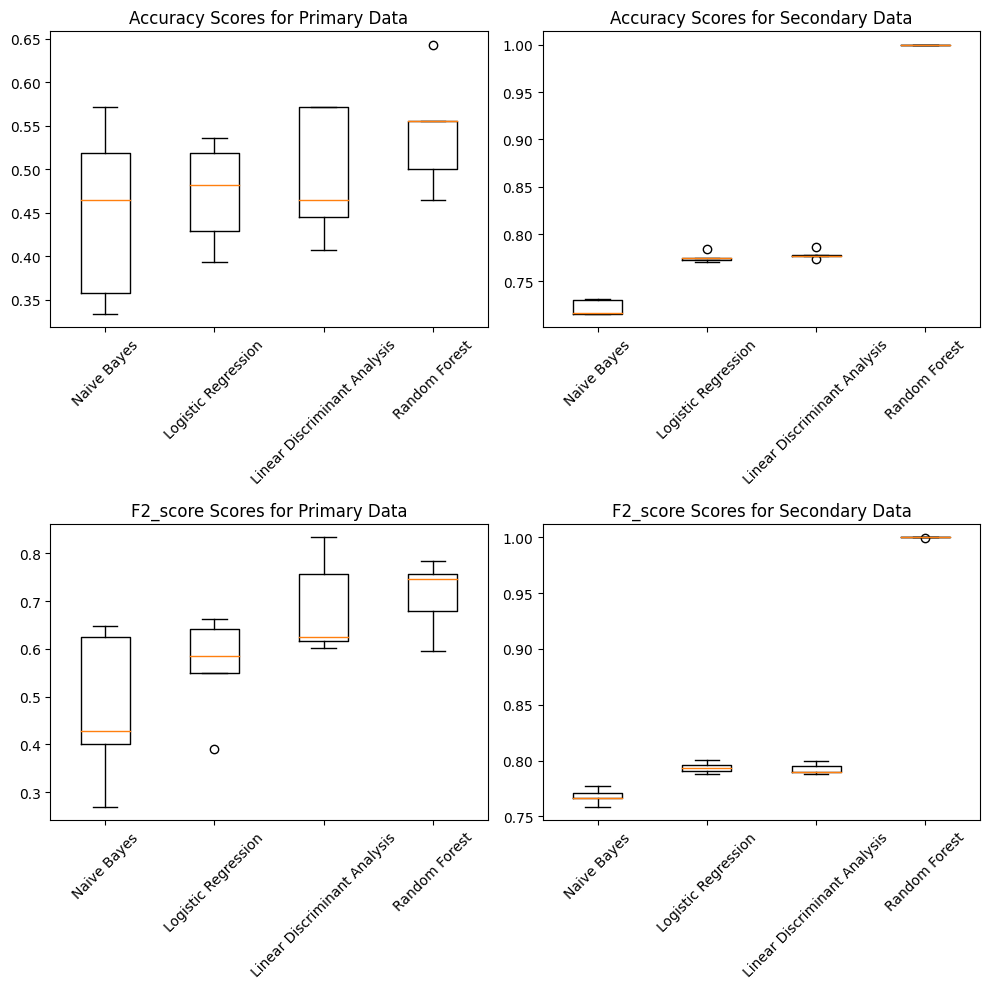

In [22]:
import matplotlib.pyplot as plt

classifiers = ['Naive Bayes', 'Logistic Regression', 'Linear Discriminant Analysis', 'Random Forest']

# Accuracy box plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, metric in enumerate(['accuracy', 'f2_score']):
    for j, data in enumerate(['primary', 'secondary']):
        axs[i, j].boxplot([results_primary[classifier][metric] if data == 'primary' else results_secondary[classifier][metric] for classifier in classifiers])
        axs[i, j].set_xticklabels(classifiers, rotation=45)
        axs[i, j].set_title(f'{metric.capitalize()} Scores for {data.capitalize()} Data')

plt.tight_layout()
plt.show()